<a href="https://colab.research.google.com/github/atakanerdogn/Health-Data-Projects/blob/main/Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
can = pd.read_csv('/content/The_Cancer_data_1500_V2 (1).csv')
can.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


In [4]:
can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


In [5]:
can.describe()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000


In [6]:
can.shape

(1500, 9)

In [7]:
can.isnull().sum()

,0
Age,0
Gender,0
BMI,0
Smoking,0
GeneticRisk,0
PhysicalActivity,0
AlcoholIntake,0
CancerHistory,0
Diagnosis,0


In [8]:
can.duplicated().sum()

np.int64(0)

In [9]:
can.drop_duplicates(inplace=True)

In [10]:
cann = can.select_dtypes(exclude='object')
canc = can.select_dtypes(include='object')


In [11]:
cann.columns

Index(['Age', 'Gender', 'BMI', 'Smoking', 'GeneticRisk', 'PhysicalActivity',
       'AlcoholIntake', 'CancerHistory', 'Diagnosis'],
      dtype='object')

In [12]:
canc.columns

Index([], dtype='object')

<Axes: xlabel='Age', ylabel='Count'>

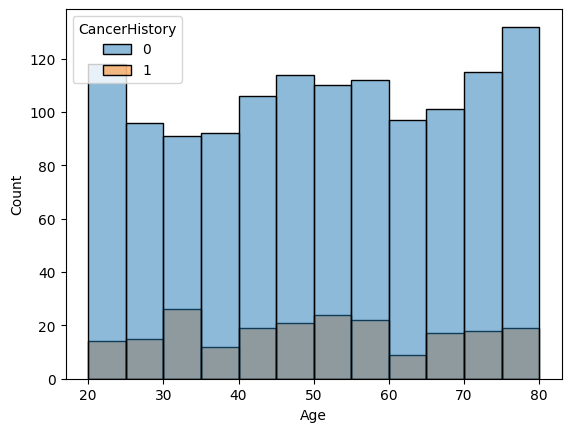

In [13]:
sns.histplot(x='Age', hue='CancerHistory', data=can)

<Axes: xlabel='BMI', ylabel='Count'>

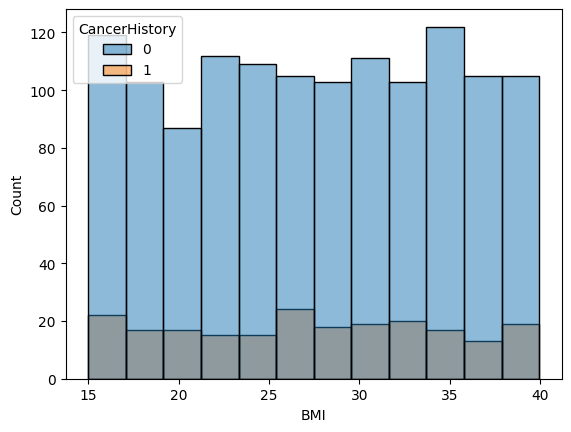

In [14]:
sns.histplot(x='BMI', hue='CancerHistory', data=can)

In [21]:
can.columns

Index(['Age', 'Gender', 'BMI', 'Smoking', 'GeneticRisk', 'PhysicalActivity',
       'AlcoholIntake', 'CancerHistory', 'Diagnosis'],
      dtype='object')

<Axes: xlabel='AlcoholIntake', ylabel='Count'>

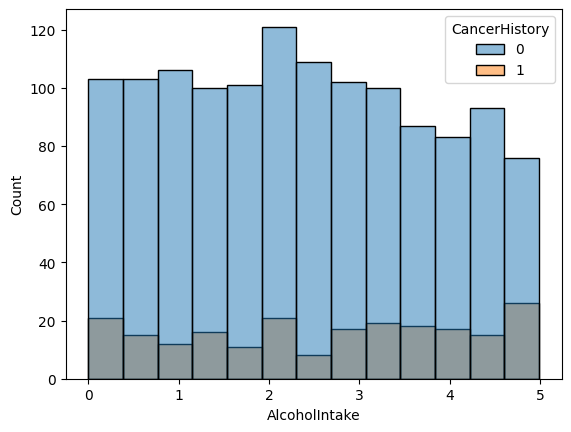

In [22]:
# alcohol intake vs cancer

sns.histplot(x='AlcoholIntake', hue='CancerHistory', data=can)

<Axes: xlabel='GeneticRisk', ylabel='Count'>

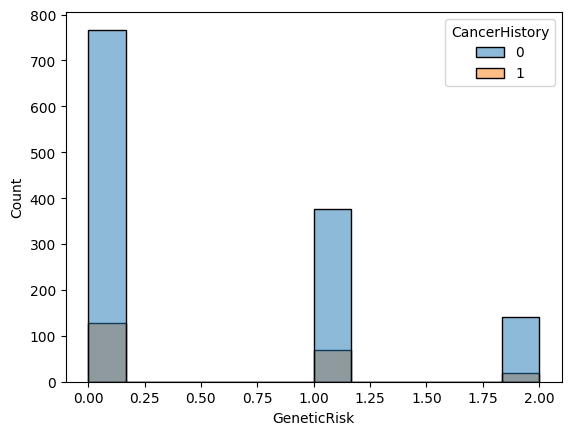

In [23]:
sns.histplot(x='GeneticRisk', hue='CancerHistory', data=can)

<Axes: ylabel='count'>

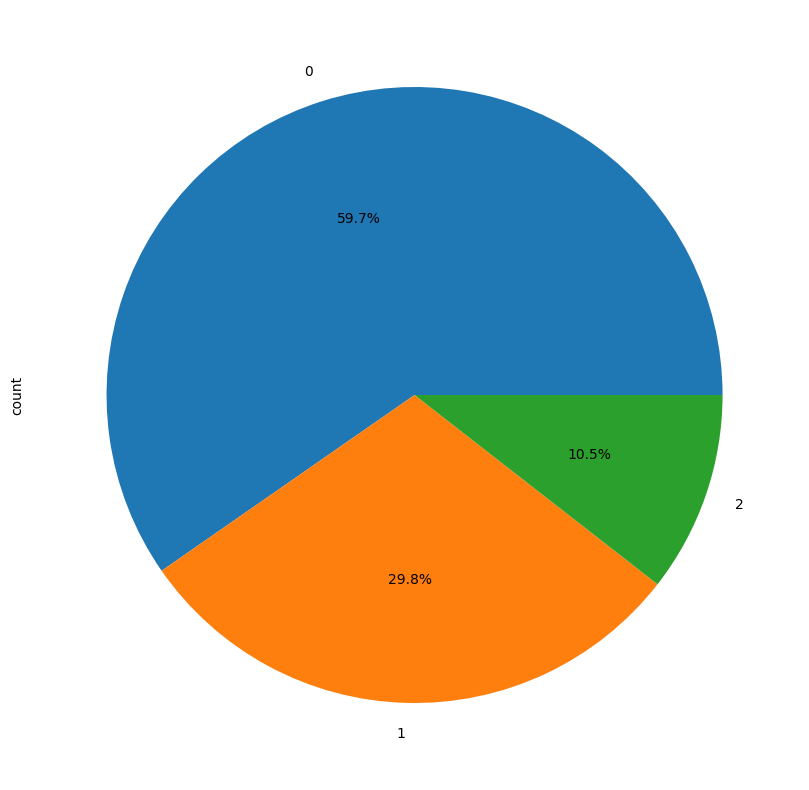

In [25]:
gen = can['GeneticRisk'].value_counts()
gen.plot(kind='pie', autopct='%1.1f%%', figsize=(10,10))

In [26]:
# physical activity and bmi grouped to cancer history

pmc = can.groupby(['BMI', 'PhysicalActivity'])['CancerHistory'].mean()
pmc

,,CancerHistory
BMI,PhysicalActivity,
15.000291,5.724077,0.0
15.003367,2.616714,0.0
15.033841,1.474539,1.0
15.036846,4.466887,0.0
15.039128,2.135375,0.0
...,...,...
39.885938,8.618438,0.0
39.908358,8.565720,0.0
39.917421,9.859342,1.0


In [28]:
corr_matrix = can.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
Age,1.000000,0.007145,0.030246,-0.013914,-0.027025,0.016396,0.003209,-0.010996,0.196603
Gender,0.007145,1.000000,-0.012516,0.035384,-0.004674,0.023401,0.009723,0.007657,0.250336
BMI,0.030246,-0.012516,1.000000,-0.012616,0.011392,0.011480,0.004711,-0.010824,0.187560
Smoking,-0.013914,0.035384,-0.012616,1.000000,-0.021039,-0.043817,-0.001660,0.016368,0.226999
GeneticRisk,-0.027025,-0.004674,0.011392,-0.021039,1.000000,-0.039721,-0.016864,-0.010833,0.253472
PhysicalActivity,0.016396,0.023401,0.011480,-0.043817,-0.039721,1.000000,0.033856,0.018136,-0.150089
AlcoholIntake,0.003209,0.009723,0.004711,-0.001660,-0.016864,0.033856,1.000000,0.055403,0.212772
CancerHistory,-0.010996,0.007657,-0.010824,0.016368,-0.010833,0.018136,0.055403,1.000000,0.392188
Diagnosis,0.196603,0.250336,0.187560,0.226999,0.253472,-0.150089,0.212772,0.392188,1.000000


<Axes: >

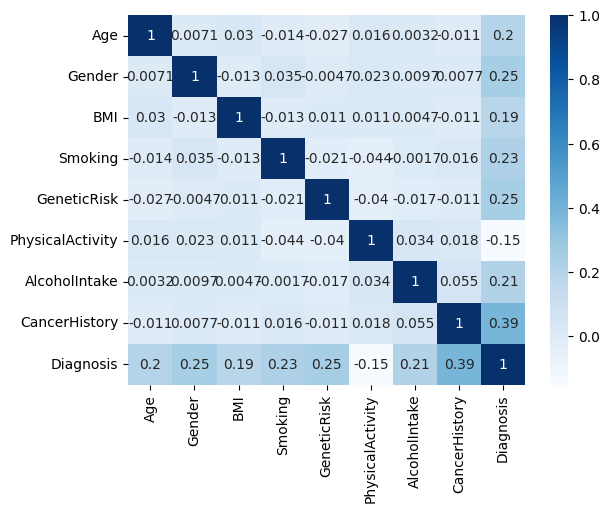

In [30]:
sns.heatmap(can.corr(), annot=True, cmap='Blues')

In [31]:
can['CancerHistory'].value_counts()

,count
CancerHistory,
0,1284
1,216


In [36]:
cancer = can[can['CancerHistory']==1]

<Axes: ylabel='Frequency'>

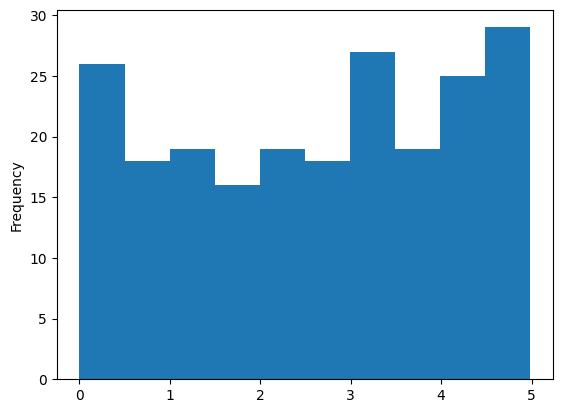

In [37]:
cancer['AlcoholIntake'].plot(kind='hist')


In [43]:
can.columns

Index(['Age', 'Gender', 'BMI', 'Smoking', 'GeneticRisk', 'PhysicalActivity',
       'AlcoholIntake', 'CancerHistory', 'Diagnosis'],
      dtype='object')

<Axes: xlabel='Diagnosis', ylabel='CancerHistory'>

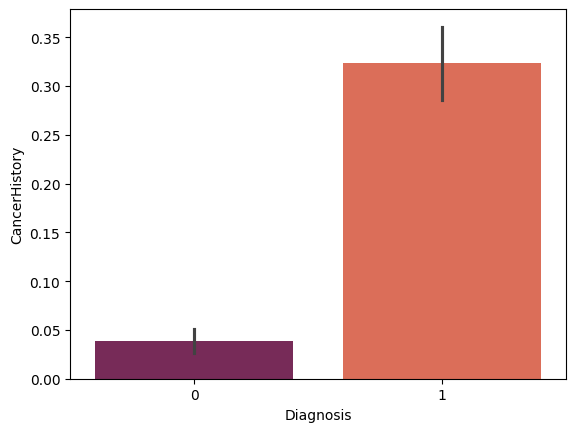

In [47]:
#cancer histOry and diagnosis

sns.barplot(x='Diagnosis', y='CancerHistory', data=can, palette='rocket')